In [16]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss 
from sklearn.metrics import confusion_matrix
import seaborn as sns
df = pd.read_csv('C:/Users/laura/OneDrive/Documents/MAG3/Semestre 1/Projet ML/cleaned_final.csv')

Balancing the dataset

In [2]:
SEED = 42
X_train, X_test, y_train, y_test=train_test_split(df.drop('Opiods Used', axis=1),
    df['Opiods Used'],test_size=0.2, stratify=df['Opiods Used'],
    shuffle=True,
    random_state=SEED)

#undersampling with NearMiss
SEED = 42
nr = NearMiss() 
  
X_train, y_train = nr.fit_sample(X_train, y_train)

Scaling the features

In [4]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


In [5]:
X_train_std.shape

(21990, 212)

In [5]:
#pip install mlxtend  

In [6]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train_std, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed: 11.8min finished

[2021-01-15 11:35:21] Features: 1/10 -- score: 0.9268303774442929[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 211 out of 211 | elapsed: 15.9min finished

[2021-01-15 11:51:14] Features: 2/10 -- score: 0.939199636198272[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed: 15.3min finished

[2021-01-15 12:06:33] Features: 3/10 -- score: 0.9480673033196908[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [7]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[15, 26, 61, 67, 68, 69, 70, 96, 209, 211]


In [8]:
sfs1.subsets_

{1: {'feature_idx': (209,),
  'cv_scores': array([0.93974534, 0.93565257, 0.93860846, 0.93610732, 0.8840382 ]),
  'avg_score': 0.9268303774442929,
  'feature_names': ('209',)},
 2: {'feature_idx': (69, 209),
  'cv_scores': array([0.94906776, 0.94452024, 0.94724875, 0.93860846, 0.91655298]),
  'avg_score': 0.939199636198272,
  'feature_names': ('69', '209')},
 3: {'feature_idx': (61, 69, 209),
  'cv_scores': array([0.95657117, 0.95202365, 0.95429741, 0.95088677, 0.92655753]),
  'avg_score': 0.9480673033196908,
  'feature_names': ('61', '69', '209')},
 4: {'feature_idx': (26, 61, 69, 209),
  'cv_scores': array([0.95929968, 0.95543429, 0.9572533 , 0.9533879 , 0.9363347 ]),
  'avg_score': 0.9523419736243748,
  'feature_names': ('26', '61', '69', '209')},
 5: {'feature_idx': (26, 61, 69, 209, 211),
  'cv_scores': array([0.95884493, 0.95520691, 0.95861755, 0.95520691, 0.9363347 ]),
  'avg_score': 0.9528422010004549,
  'feature_names': ('26', '61', '69', '209', '211')},
 6: {'feature_idx': (2

In [10]:
pos=[15, 26, 61, 67, 68, 69, 70, 96, 209, 211]
colname = X_train.columns[pos]
colname


Index(['HCPCS B Codes', 'HCPCS M Codes', 'CPT Category - Anesthesia',
       'NDC Class - Benzo', 'NDC Class - Misc (Zolpidem)',
       'NDC Class - Muscle Relaxants', 'NDC Class - Stimulants',
       'Benefits State_WA', 'Weekly Wage squared', 'Weekly Wage cubic'],
      dtype='object')

In [11]:
X_selected=X_train_std[:, feat_cols]
X_selected

array([[-0.01508071, -0.30796731, -0.60226985, ..., -0.11211957,
        -0.35987874, -0.08124047],
       [-0.01508071, -0.30796731, -0.60226985, ..., -0.11211957,
        -0.35987874, -0.08124047],
       [-0.01508071, -0.30796731, -0.60226985, ..., -0.11211957,
        -0.35987874, -0.08124047],
       ...,
       [-0.01508071, -0.30796731,  1.50344826, ..., -0.11211957,
        -0.45300826, -0.08566101],
       [-0.01508071, -0.30796731,  1.50344826, ..., -0.11211957,
         1.95209008,  0.49448342],
       [-0.01508071, -0.30796731, -0.60226985, ..., -0.11211957,
         0.0482566 , -0.03046104]])

In [12]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import matthews_corrcoef, roc_auc_score
clf = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf.fit(X_selected, y_train)

y_test_pred = clf.predict(X_test_std[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))
print('Testing AUC on selected features: %.3f' % roc_auc_score(y_test, y_test_pred))
print('Testing MCC on selected features: %.3f' % matthews_corrcoef(y_test, y_test_pred))

Testing accuracy on selected features: 0.345
Testing AUC on selected features: 0.605
Testing MCC on selected features: 0.155


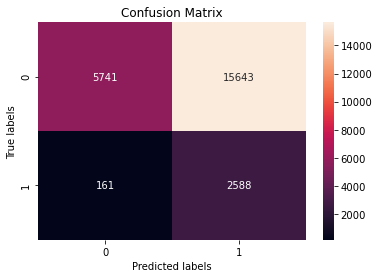

In [17]:
cm=confusion_matrix(y_test,clf.predict(X_test_std[:, feat_cols]))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

#### To compare with the model on all the trainning set :

In [19]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf2.fit(X_train_std, y_train)

y_test_pred = clf2.predict(X_test_std)
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))
print('Testing AUC on selected features: %.3f' % roc_auc_score(y_test, y_test_pred))
print('Testing MCC on selected features: %.3f' % matthews_corrcoef(y_test, y_test_pred))

Testing accuracy on selected features: 0.847
Testing AUC on selected features: 0.904
Testing MCC on selected features: 0.584


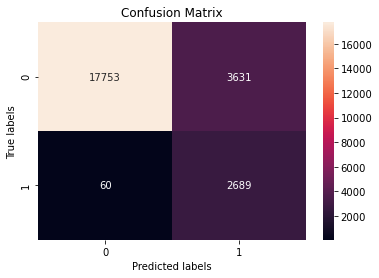

In [21]:
cm2=confusion_matrix(y_test,clf2.predict(X_test_std))
   
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

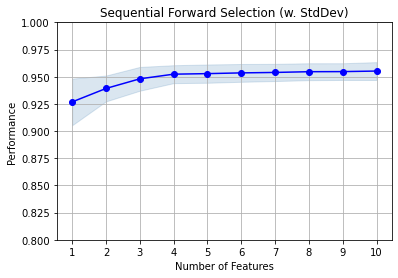

In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()